# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [118]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read the "data/penguins.csv" file as a pandas DataFrame and store the result in the penguins_df variable
penguins_df = pd.read_csv("data/penguins.csv")

In [119]:
# Print the head of the penguins_df DataFrame
print(penguins_df.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE


In [120]:
# Print the information display of the penguins_df DataFrame
print(penguins_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None


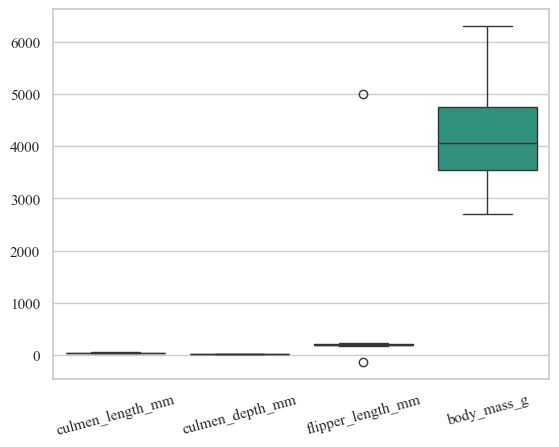

In [121]:
# Set the general style of the plots using seaborn
sns.set_theme(style = "whitegrid", font = "Times New Roman", palette = "viridis")

# Visualise the penguins_df DataFrame using a boxplot to check for outliers
sns.boxplot(data = penguins_df)
plt.xticks(rotation = 15)
plt.show()

In [122]:
# Drop null values from the penguins_df DataFrame
penguins_df = penguins_df.dropna()

# Print the outliers in the penguins_df DataFrame
print(penguins_df[(penguins_df["flipper_length_mm"] < 0) | (penguins_df["flipper_length_mm"] > 4000)])

    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
9               42.0             20.2             5000.0       4250.0  MALE
14              34.6             21.1             -132.0       4400.0  MALE


In [123]:
# Drop the rows containing the outliers in the penguins_df DataFrame and assign the result to the penguins_clean variable
penguins_clean = penguins_df.drop([9,14])

In [124]:
# Print the head of the penguins_clean DataFrame
print(penguins_clean.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
4              36.7             19.3              193.0       3450.0  FEMALE
5              39.3             20.6              190.0       3650.0    MALE


In [125]:
# Create dummy variables on the penguins_clean DataFrame via one-hot encoding and assign the result to penguins_dummies
penguins_dummies = pd.get_dummies(penguins_clean).drop("sex_.", axis = 1)

# Transform the penguins_dummies DataFrame by using the standard scaling method and assign the result to the penguins_dummies_transformed variable
scaler = StandardScaler()
penguins_dummies_transformed = scaler.fit_transform(penguins_dummies)

# Create a new pandas DataFrame with data contained in the penguins_dummies-transformed array and column names identitcal to those of the penguins_dummies DataFrame and assign the result to the penguins_preprocessed variable
penguins_preprocessed = pd.DataFrame(data = penguins_dummies_transformed, columns = penguins_dummies.columns)

# Print the head of the penguins_preprocessed DataFrame
print(penguins_preprocessed.head())

   culmen_length_mm  culmen_depth_mm  ...  sex_FEMALE  sex_MALE
0         -0.905520         0.793126  ...   -0.991031  0.997001
1         -0.831938         0.128503  ...    1.009050 -1.003008
2         -0.684775         0.435252  ...    1.009050 -1.003008
3         -1.347011         1.099875  ...    1.009050 -1.003008
4         -0.868729         1.764498  ...   -0.991031  0.997001

[5 rows x 6 columns]


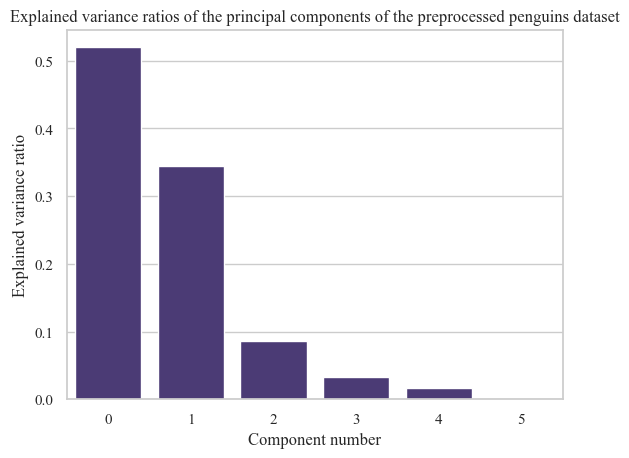

Number of desired components: 2


In [126]:
# Perform Principal Component Analysis on the penguins_preprocessed DataFrame and visualise the result
pca = PCA()
pca.fit(penguins_preprocessed)
sns.barplot(x = range(pca.n_components_), y = pca.explained_variance_ratio_).set(xlabel = "Component number", ylabel = "Explained variance ratio", title = "Explained variance ratios of the principal components of the preprocessed penguins dataset")
plt.show()

# Calculate the number of desired components, that is, the number of components with explained variance ratio greater than 10%, and assign the result to the n_components variable
n_components = sum(pca.explained_variance_ratio_ > 0.1)

# Print the number of desired components
print(f"Number of desired components: {n_components}")

In [127]:
# Perform Principal Component Analysis on the penguins_preprocessed DataFrame with 5 components and assign the result to the penguins_PCA variable
pca = PCA(n_components = n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

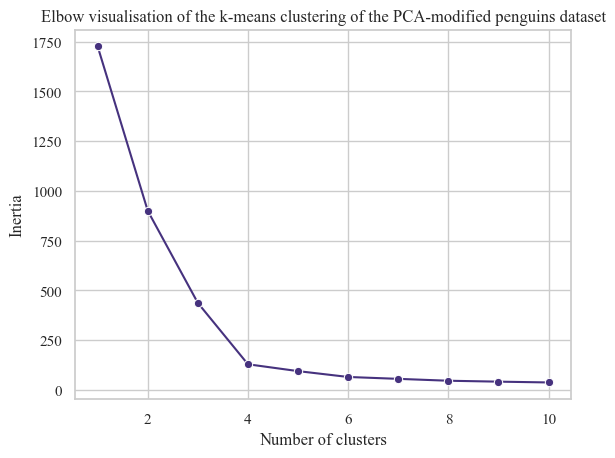

In [128]:
# Perform k-means clustering on the penguins_PCA array, setting random_state = 42, and determine the number of clusters via the elbow method
clusters = []
inertias = []
for i in range(1,11):
    km = KMeans(n_clusters = i, random_state = 42).fit(penguins_PCA)
    clusters.append(i)
    inertias.append(km.inertia_)
sns.lineplot(x = clusters, y = inertias, marker = "o").set(xlabel = "Number of clusters", ylabel = "Inertia", title = "Elbow visualisation of the k-means clustering of the PCA-modified penguins dataset")
plt.show()

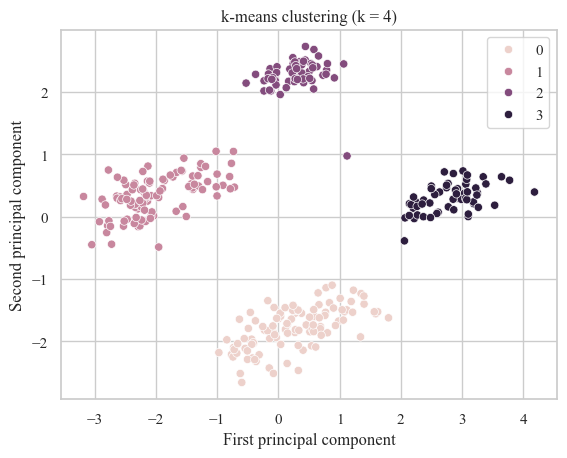

In [129]:
# Assign the integer 4 to the n_clusters variable
n_clusters = 4

# Perform k-means clustering on the penguins_PCA array, setting random_state = 42, with n_clusters as the number of clusters and assign the model to the kmeans variable and visualise the result using the first two principal components of the penguins_PCA array
kmeans = KMeans(n_clusters = n_clusters, random_state = 42).fit(penguins_PCA)
sns.scatterplot(x = penguins_PCA[:, 0], y = penguins_PCA[:, 1], hue = kmeans.labels_).set(xlabel = "First principal component", ylabel = "Second principal component", title = f"k-means clustering (k = {n_clusters})")
plt.show()

In [130]:
# Add a "label" column to the penguins_clean DataFrame, containing the kmeans.label_ array
penguins_clean["label"] = kmeans.labels_

# Group the penguins_clean DataFrame by the "label" column, aggregate the grouped data by the "mean" function and assign the result to the stat_penguins variable
stat_penguins = penguins_clean.groupby("label").agg("mean")

In [131]:
# Print the head of the stat_penguins DataFrame
print(stat_penguins.head())

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
label                                                                   
0             43.878302        19.111321         194.764151  4006.603774
1             40.217757        17.611215         189.046729  3419.158879
2             45.545763        14.262712         212.779661  4683.050847
3             49.473770        15.718033         221.540984  5484.836066
